In [1]:
import model

Tensor("Placeholder:0", shape=(?, ?, ?, 3), dtype=float32)
Tensor("conv5_3/conv5_3:0", shape=(?, ?, ?, 512), dtype=float32)
Tensor("rpn_conv/3x3/rpn_conv/3x3:0", shape=(?, ?, ?, 512), dtype=float32)
Tensor("lstm_o/Reshape_2:0", shape=(?, ?, ?, 512), dtype=float32)
Tensor("lstm_o/Reshape_2:0", shape=(?, ?, ?, 512), dtype=float32)
Tensor("rpn_cls_score/Reshape_1:0", shape=(?, ?, ?, 20), dtype=float32)
Tensor("rpn_cls_prob:0", shape=(?, ?, ?, ?), dtype=float32)
Tensor("Reshape_2:0", shape=(?, ?, ?, 20), dtype=float32)
Tensor("rpn_bbox_pred/Reshape_1:0", shape=(?, ?, ?, 40), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 3), dtype=float32)
INFO:tensorflow:Restoring parameters from ctpn/models/VGGnet_fast_rcnn_iter_470000.ckpt


Using TensorFlow backend.


In [2]:
from glob import glob
from IPython.display import Image as display
import numpy as np
from PIL import Image
import time
paths = glob('./test/*.*')
paths

['./test/3bef1970fd6e4601a292d7b272128512.jpeg',
 './test/4.jpg',
 './test/CgQgIll5TaGADkiiAAFhxGXefcA951.jpg',
 './test/CgQgIlljJlyAF3fGAABk3TG5RM4164.jpg',
 './test/demo-card-1.jpeg',
 './test/IMG_1563.JPG',
 './test/test.png',
 './test/WechatIMG305.jpeg']

## pytorch crnn

It takes time:14.9061510563s
---------------------------------------
图像的文字朝向为:270度
识别结果:

产品名称:个体营养分析仪型号:NQA-Pplus
输入电源:-220V频率:50Hz输入功率:95W
安全类别:I类BF型
产产品注册编号:晋械注准20152210006
出厂编号:NA021602001B
士生产日期:2016年02月25日
委托方/注册人:山西四海华辰科技有限公司
住所:太原高新区产业路48号新岛科技园C座208室
联系方式:0351-7037508
医药产业基地天华大街33号院!号楼
生产许可证编号:京食药监械生产许可20140021号
联系电话:010-56882333
,-


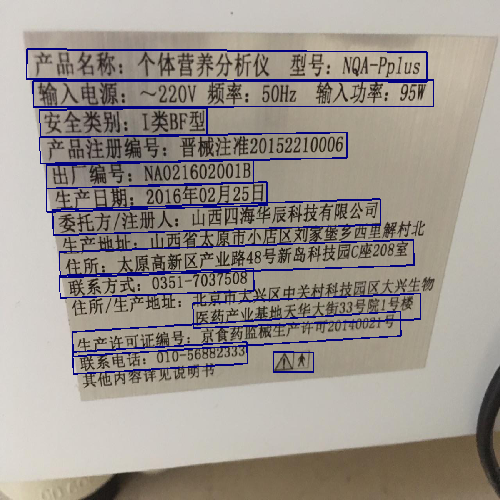

In [3]:
im = Image.open(paths[0])
img = np.array(im.convert('RGB'))
t = time.time()
result,img,angle = model.model(img,model='crnn', detectAngle=True) ## if model == crnn ,you should install pytorch
print "It takes time:{}s".format(time.time()-t)
print "---------------------------------------"
print "图像的文字朝向为:{}度\n".format(angle),"识别结果:\n"

for key in result:
    print result[key][1]
    
Image.fromarray(img).resize((500,500))

## keras crnn 

It takes time:12.5485398769s
---------------------------------------
图像的文字朝向为:270度
识别结果:

产品名称:个体营养分析仪号:NQ4-Pplus
输入电源: 220V频率:50Hz 输入功率:95W
安全类别:I类BF型
产品注册编号:晋械注准20152210006
出厂编号:NA021602001B
生产日期:2016年02月25日
委托方/注册人:山西四海华辰科技有限公司
住所:太原高新区产业路48号新岛科技园C座208室
联系方式:0351-7037508
医药产业基炮天华大街33号庶1导替
生产许可证编号:京食药监械生产许可2014002/号
联系电话:010-56882333
今企山众


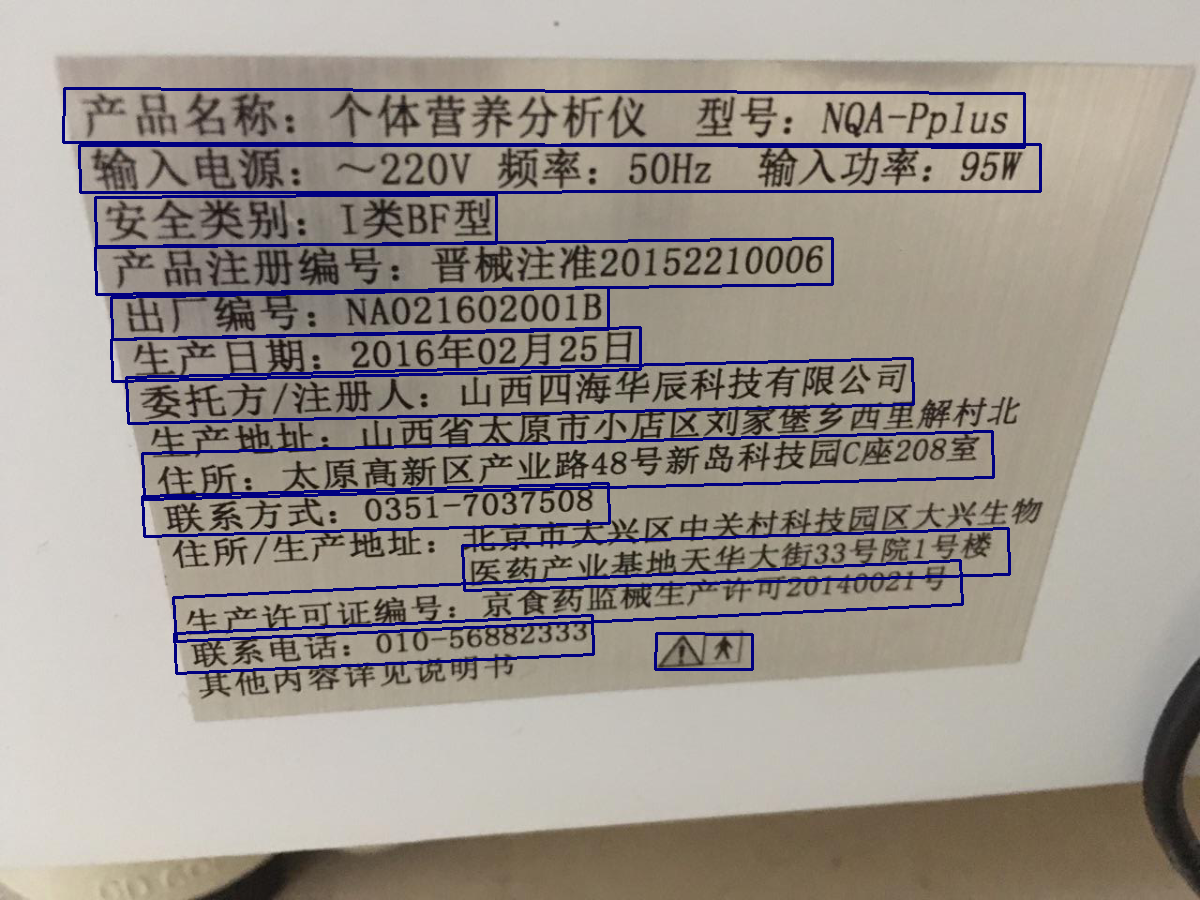

In [4]:
im = Image.open(paths[0])
img = np.array(im.convert('RGB'))
t = time.time()
result,img,angle = model.model(img,model='keras',detectAngle=True) ##if model == keras ,you should install keras
print "It takes time:{}s".format(time.time()-t)
print "---------------------------------------"
print "图像的文字朝向为:{}度\n".format(angle),"识别结果:\n"
for key in result:
    print result[key][1]
Image.fromarray(img)